In [122]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [124]:
df = pd.read_csv("28-urban_pedestrian_locations_with_labels (1).csv")

In [126]:
df.head()

,x_position,y_position,true_cluster
0,0.830586,-0.447733,1
1,0.701678,0.816918,0
2,1.022080,-0.492571,1
3,-0.316765,0.953438,0
4,0.293226,1.057185,0


In [128]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   x_position    500 non-null    float64
 1   y_position    500 non-null    float64
 2   true_cluster  500 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 11.8 KB


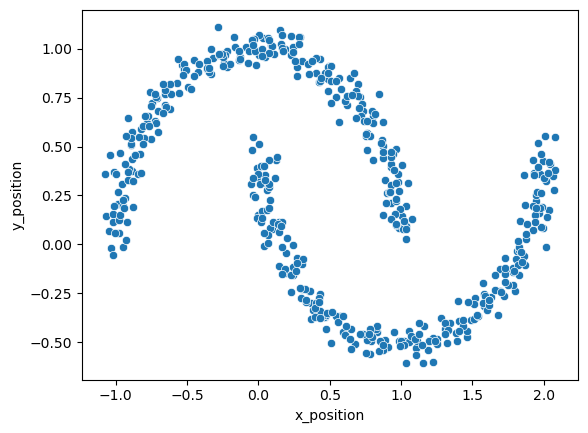

In [130]:
sns.scatterplot(data= df, x= "x_position", y ="y_position")
plt.show()

In [131]:
df =df.drop("true_cluster", axis=1)

In [134]:
df.head()

,x_position,y_position
0,0.830586,-0.447733
1,0.701678,0.816918
2,1.022080,-0.492571
3,-0.316765,0.953438
4,0.293226,1.057185


In [136]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [138]:
X_scaled =scaler.fit_transform(df)

In [140]:
from sklearn.cluster import DBSCAN

In [142]:
dbscan = DBSCAN()

In [144]:
dbscan.fit(X_scaled)

DBSCAN()

In [146]:
dbscan.labels_

array([0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,

In [148]:
X_scaled =pd.DataFrame(X_scaled, columns = ["X_position", "y_position"])

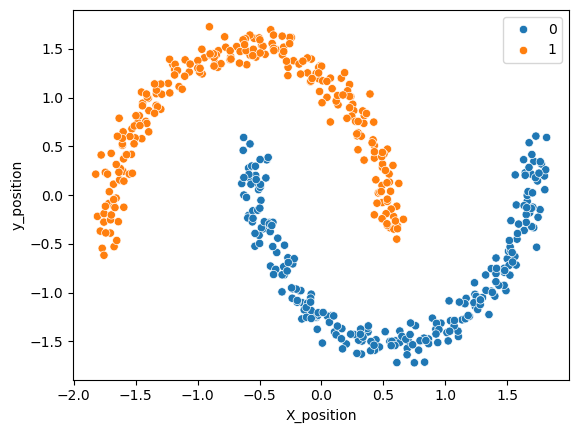

In [150]:
sns.scatterplot(data =X_scaled, x="X_position", y= "y_position", hue =dbscan.labels_)
plt.show()

In [152]:
eps_values =[0.1, 0.2, 0.3, 0.4, 0.5 ,0.6]
min_samples_values = [4, 5, 6]

In [154]:
from sklearn.metrics import silhouette_score

In [156]:
results = []

for eps in eps_values:
    for min_samples in min_samples_values:
        db = DBSCAN(eps=eps, min_samples=min_samples).fit(X_scaled)
        labels = db.labels_

        if len(set(labels)) <= 1:
            continue

        sil_score = silhouette_score(X_scaled, labels)

        results.append(
            {
                "eps": eps,
                "min_samples": min_samples,
                "Silhouette": sil_score,
                "n_cluster": len(set(labels)) - (1 if -1 in labels else 0)
            }
        )

results_df = pd.DataFrame(results)
results_df = results_df.sort_values(by="Silhouette", ascending=False)


In [160]:
results_df

,eps,min_samples,Silhouette,n_cluster
9,0.4,4,0.389338,2
10,0.4,5,0.389338,2
16,0.6,5,0.389338,2
15,0.6,4,0.389338,2
14,0.5,6,0.389338,2
13,0.5,5,0.389338,2
12,0.5,4,0.389338,2
11,0.4,6,0.389338,2
17,0.6,6,0.389338,2
8,0.3,6,0.389338,2
